In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [32]:
df=pd.read_csv('HR.csv')

In [33]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [35]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [36]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

Task No. 1 (EDA) Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [37]:
df['left'].describe()

count    14999.000000
mean         0.238083
std          0.425924
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64

In [53]:
print('No. of employees retained in company: ',df[df['left']==0].shape[0])
print('No of employees left from company: ',df[df['left']==1].shape[0])

No. of employees retained in company:  11428
No of employees left from company:  3571


In [61]:
df1=df[['left','salary']]
left=df1[df['left']==1].salary.value_counts()
retained=df1[df['left']==0].salary.value_counts()
left_percentage= left/ (left + retained)
retained_percentage=retained / (left + retained)
count1={"left":left,"retained":retained,"left_percentage":left_percentage,"retain_percentage":retained_percentage}
counts1=pd.DataFrame(count1)
counts1

,left,retained,left_percentage,retain_percentage
salary,,,,
low,2172,5144,0.296884,0.703116
medium,1317,5129,0.204313,0.795687
high,82,1155,0.066289,0.933711


C:\Users\HP\AppData\Local\Temp\ipykernel_12132\1106062465.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
C:\Users\HP\AppData\Local\Temp\ipykernel_12132\1106062465.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


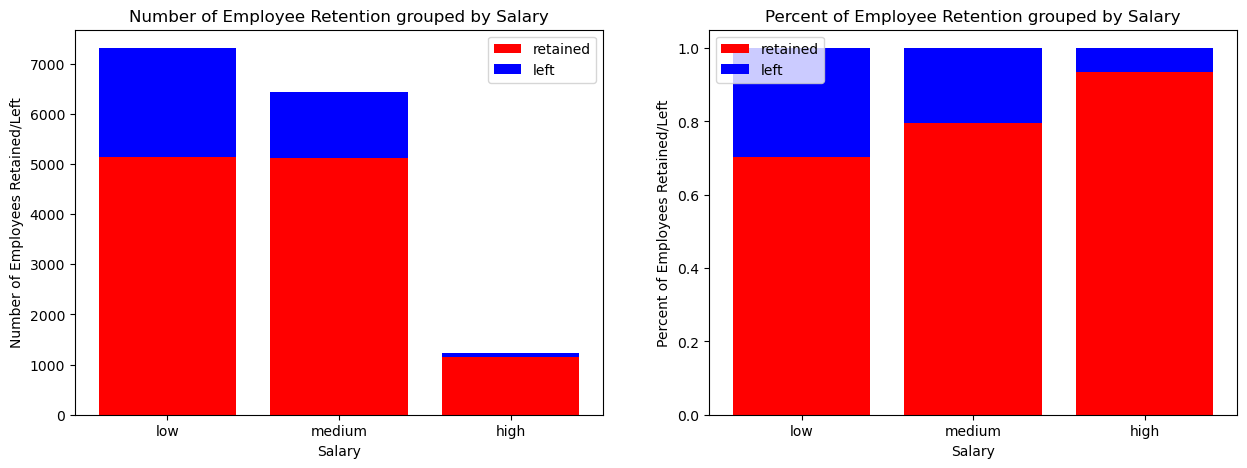

In [74]:
x = counts1.index
y1 = counts1.retained
y2 = counts1.left

f, axs = plt.subplots(2,2,figsize=(15,5))
plt.subplot(1, 2, 1)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Number of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Number of Employees Retained/Left")
plt.legend(['retained', 'left'])
y1 = counts1.retain_percentage
y2 = counts1.left_percentage

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Salary")
plt.xlabel("Salary")
plt.ylabel("Percent of Employees Retained/Left")
plt.legend(['retained', 'left'])

plt.show()

As we can see that the lower the salary, the more number of employees leave the company

NOW SHOW CORELATION BETWEEN DEPARTMENTS AND EMPLOYEES RETENTION

In [79]:
df1=df[['left','Department']]
left=df1[df['left']==1].Department.value_counts()
retain=df1[df['left']==0].Department.value_counts()
left_percent=left/(left + retain)
retain_percent=retain/(left + retain)
counts2={"retain":retain,"left":left,"retained_percent":retain_percent,"left_percent":left_percent}
counts2=pd.DataFrame(counts2)
counts2

,retain,left,retained_percent,left_percent
Department,,,,
IT,954,273,0.777506,0.222494
RandD,666,121,0.846252,0.153748
accounting,563,204,0.734029,0.265971
hr,524,215,0.709066,0.290934
management,539,91,0.855556,0.144444
marketing,655,203,0.763403,0.236597
product_mng,704,198,0.780488,0.219512
sales,3126,1014,0.755072,0.244928
support,1674,555,0.751009,0.248991


C:\Users\HP\AppData\Local\Temp\ipykernel_12132\1753749220.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
C:\Users\HP\AppData\Local\Temp\ipykernel_12132\1753749220.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 2)


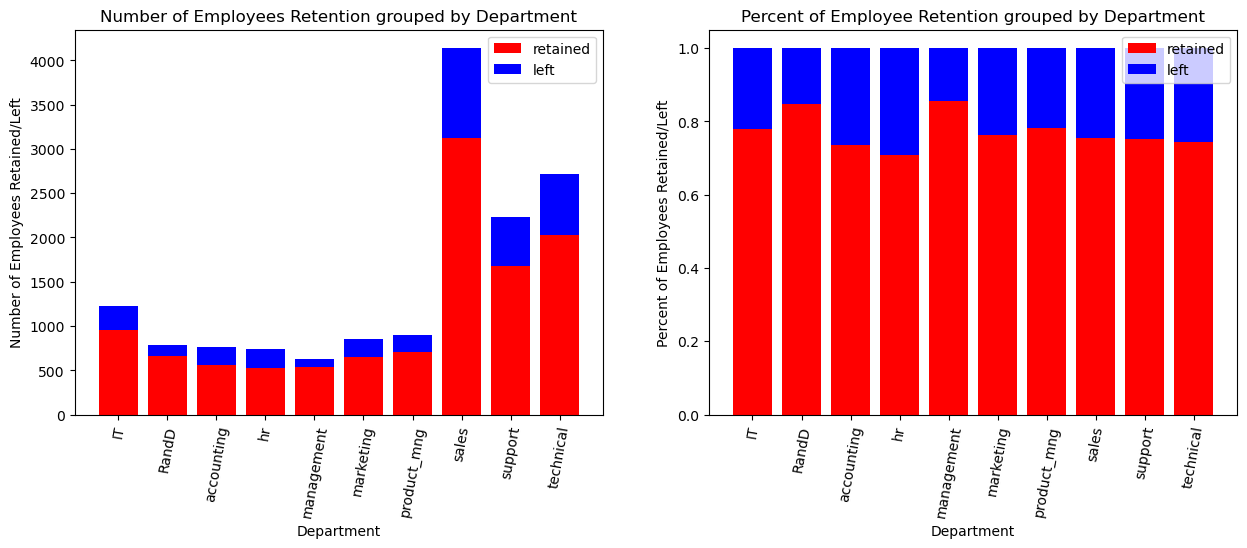

In [80]:
x=counts2.index
y1=counts2.retain
y2=counts2.left

f,axs=plt.subplots(2,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(x,y1,color='r')
plt.bar(x,y2,bottom=y1,color='b')
plt.title("Number of Employees Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained','left'])

y1=counts2.retained_percent
y2=counts2.left_percent

plt.subplot(1, 2, 2)
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.title("Percent of Employee Retention grouped by Department")
plt.xlabel("Department")
plt.ylabel("Percent of Employees Retained/Left")
plt.xticks(rotation=80)
plt.legend(['retained', 'left'])

plt.show()


As you can see that the percentage of employees retained are slightly greater for the 'RanD' and 'Management' Department

NOW WE ARE BUILDING LOGISTIC REGRESSION MODEL

In [82]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

following columns are the features that are directly or indirectly impact on employee retention

In [93]:
df1=df[['satisfaction_level','average_montly_hours','left','promotion_last_5years','Department','salary']]

In [94]:
df1.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,Department,salary
0,0.38,157,1,0,sales,low
1,0.80,262,1,0,sales,medium
2,0.11,272,1,0,sales,medium
3,0.72,223,1,0,sales,low
4,0.37,159,1,0,sales,low


In [95]:
df1 = pd.get_dummies(df1, columns = ['Department','salary'])

In [98]:
df1.sample(10)

,satisfaction_level,average_montly_hours,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
12704,0.74,216,1,0,False,False,False,False,False,False,False,True,False,False,False,True,False
2970,0.74,230,0,0,False,False,False,False,False,False,True,False,False,False,False,True,False
6982,0.74,113,0,0,False,False,False,False,False,False,False,False,False,True,False,False,True
3820,0.79,212,0,0,False,False,False,False,False,True,False,False,False,False,False,False,True
12152,0.37,143,1,0,False,False,False,False,False,True,False,False,False,False,False,True,False
2485,0.96,153,0,0,False,False,False,False,False,False,False,False,False,True,False,False,True
12358,0.31,135,1,0,False,False,False,False,False,False,False,False,True,False,False,True,False
11812,0.82,210,0,0,False,False,False,False,True,False,False,False,False,False,True,False,False
13295,0.93,233,0,0,True,False,False,False,False,False,False,False,False,False,False,False,True
9427,0.98,178,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False


In [97]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   average_montly_hours    14999 non-null  int64  
 2   left                    14999 non-null  int64  
 3   promotion_last_5years   14999 non-null  int64  
 4   Department_IT           14999 non-null  bool   
 5   Department_RandD        14999 non-null  bool   
 6   Department_accounting   14999 non-null  bool   
 7   Department_hr           14999 non-null  bool   
 8   Department_management   14999 non-null  bool   
 9   Department_marketing    14999 non-null  bool   
 10  Department_product_mng  14999 non-null  bool   
 11  Department_sales        14999 non-null  bool   
 12  Department_support      14999 non-null  bool   
 13  Department_technical    14999 non-null  bool   
 14  salary_high             14999 non-null

In [100]:
x=np.asarray(df1.loc[:,df1.columns!='left'])
y=np.asarray(df1.loc[:,df1.columns=='left'])

In [101]:
x.shape

(14999, 16)

In [102]:
y.shape

(14999, 1)

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
scaler=StandardScaler()

In [105]:
scaler

StandardScaler()

In [109]:
scaler.fit(x)

StandardScaler()

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
clf=LogisticRegression()

In [115]:
clf

LogisticRegression()

In [116]:
from sklearn.model_selection import train_test_split

In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [127]:
x_train.shape

(11999, 16)

In [128]:
x_test.shape

(3000, 16)

In [129]:
clf.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [130]:
y_pred=clf.predict(x_test)

In [160]:
print((y_pred).sha)

(3000,)


In [141]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [146]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [142]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.765


In [149]:
print("F1 Score: ",f1_score(y_test,y_pred))

F1 Score:  0.3175217812197483


In [153]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2294
           1       0.50      0.23      0.32       706

    accuracy                           0.77      3000
   macro avg       0.65      0.58      0.59      3000
weighted avg       0.73      0.77      0.73      3000

